In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from sympy import stats
import sympy
import scipy
from sympy.stats import Beta, Bernoulli, density
from matplotlib.pylab import subplots, linspace
from scipy.optimize import fminbound
from scipy.integrate import  quad

In [5]:
from sympy.abc import p,x
# prior = density(Beta('p',1.3,1.3))(p)
prior = density(Beta('p',6,6))(p)
likelihood=density(Bernoulli('x',p))(x)
data = (0,0,0,0,0,0,0,1,1,1,1,1,1,1,1)
posteriors = [prior]
for i in data:
    posteriors.append(posteriors[-1]*likelihood.subs(x,i))

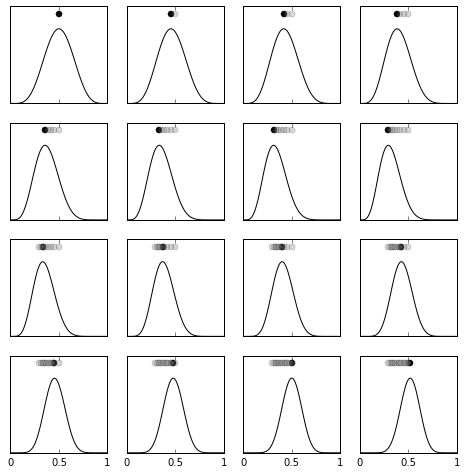

In [6]:
fig,ax = subplots(4,4,sharex=True,
                  subplot_kw={'yticks':[''],
                              'yticklabels':[''],
                              'xticks':[0,0.5,1],
                              'xticklabels':[0,0.5,1]})
fig.set_size_inches((8,8))
pvals = linspace(0,1,100)
mxvals = []
for i,j in zip(ax.flat,posteriors):
    i.plot(pvals, sympy.lambdify(p,j)(pvals),color='k')
    mxval = fminbound(sympy.lambdify(p,-j),0,1)
    mxvals.append(mxval)
    h = i.axis()[-1]
    i.axis(ymax=h*1.3)
    i.plot(mxvals[-1],h*1.2,'ok')
    i.plot(mxvals[:-1],[h*1.2]*len(mxvals[:-1]),'o',color='gray',alpha=.3)
    
fig.savefig('../fig-statistics/MAP_001.png')

In [7]:
from sympy.abc import p,x
prior = density(Beta('p',1.3,1.3))(p)
# prior = density(Beta('p',6,6))(p)
likelihood=density(Bernoulli('x',p))(x)
data = (0,0,0,0,0,0,0,1,1,1,1,1,1,1,1)
posteriors = [prior]
for i in data:
    posteriors.append(posteriors[-1]*likelihood.subs(x,i))

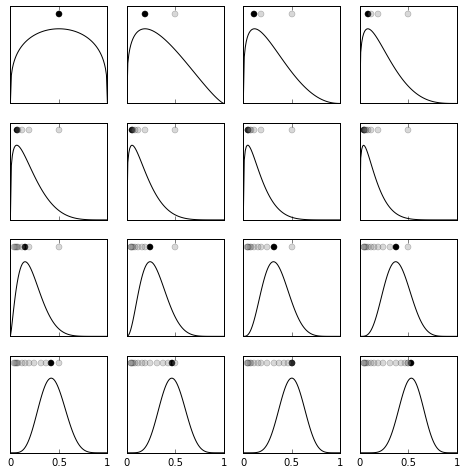

In [8]:
fig,ax = subplots(4,4,sharex=True,
                  subplot_kw={'yticks':[''],
                              'yticklabels':[''],
                              'xticks':[0,0.5,1],
                              'xticklabels':[0,0.5,1]})
fig.set_size_inches((8,8))
pvals = linspace(0,1,100)
mxvals = []
for i,j in zip(ax.flat,posteriors):
    i.plot(pvals, sympy.lambdify(p,j)(pvals),color='k')
    mxval = fminbound( sympy.lambdify(p,-j),0,1)
    mxvals.append(mxval)
    h = i.axis()[-1]
    i.axis(ymax=h*1.3)
    i.plot(mxvals[-1],h*1.2,'ok')
    i.plot(mxvals[:-1],[h*1.2]*len(mxvals[:-1]),'o',color='gray',alpha=.3)
    
fig.savefig('../fig-statistics/MAP_002.png')

In [9]:
# normalization constant 
v,_=scipy.integrate.quad(sympy.lambdify(p,j),0,1)
final_pdf = j/v
# compute credible interval
cred = lambda c:abs(quad(sympy.lambdify(p,final_pdf),-c+mxval,c+mxval)[0]-0.95) # keep first part only
c=fminbound(cred,.1,1-mxval)

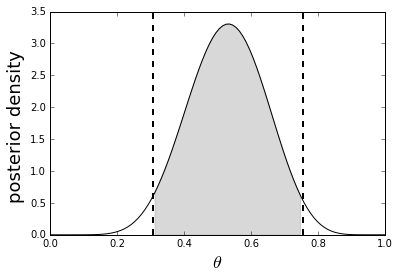

In [10]:
fig,ax=subplots()
fvals = sympy.lambdify(p,final_pdf)(pvals)
ax.plot(pvals,fvals,color='k')
ax.fill_between(pvals,fvals,where=(pvals < c+mxval) & (pvals > -c+mxval),alpha=.3,color='gray')
ax.set_ylabel("posterior density ",fontsize=18)
ax.set_xlabel(r"$\theta$",fontsize=18)
ax.vlines([-c+mxval,mxval+c],0,3.5,linestyle='--',lw=2.)
fig.savefig('../fig-statistics/MAP_003.png')